In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df_1 = pd.read_csv('BTC_TWEETS')

In [76]:
df = df_1.drop('Unnamed: 0', axis=1)

In [77]:
df

,Created_at,tweets
0,2021-12-08 21:22:49,"@MikeFernholz According to News Bitcoin, the R..."
1,2021-12-08 21:22:49,RT @IT_MYNFT: BOOM!!!! Here we go\n\n🔥Grab Tok...
2,2021-12-08 21:22:49,RT @BTC_Archive: Why are spot #Bitcoin ETFs sa...
3,2021-12-08 21:22:48,RT @rarecandyio: BREAKING: We are proud to ann...
4,2021-12-08 21:22:48,RT @knightmetaverse: $KINO #KINO #BSC #Bitcoin...
...,...,...
2355,2021-12-08 21:11:21,"RT @ashwsbreal: If #Bitcoin hits $100,000+ by ..."
2356,2021-12-08 21:11:20,RT @CryptoMichNL: Rumors say we might have a S...
2357,2021-12-08 21:11:20,RT @ashwsbreal: #Bitcoin will melt faces soon !
2358,2021-12-08 21:11:19,@OTC_Bitcoin ?


In [78]:
df = df[~df.tweets.str.contains('RT')]

In [79]:
df

,Created_at,tweets
0,2021-12-08 21:22:49,"@MikeFernholz According to News Bitcoin, the R..."
5,2021-12-08 21:22:48,@infinity__twice E pra comprar #Bitcoin eu rec...
8,2021-12-08 21:22:46,Get rich while mother earth dies. Hahaha for w...
9,2021-12-08 21:22:46,https://t.co/jFQ5s630dP #dragonball #dragonbal...
11,2021-12-08 21:22:46,@ensarss0 @dogknuzun https://t.co/mOHc6HxfZl
...,...,...
2343,2021-12-08 21:11:24,🇹🇷 En güncel Bitcoin (BTC) fiyatı 🇹🇷\n✅PARiBU ...
2347,2021-12-08 21:11:23,"@SalijaSalija @BTC_Archive 0.23 bitcoin, it's ..."
2349,2021-12-08 21:11:23,Considering the irony of my recent tweets 🧐😝 #...
2352,2021-12-08 21:11:21,La patience est la clé du succès #bitcoin


In [80]:
## importing langdetect to determine english tweets
from langdetect import detect
## creating a function for determining english or non-english tweets
from langdetect import DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 0

def is_english(text):
    try:
        if detect(text) != "en":
            return False
    except LangDetectException:
        return False
    return True

In [81]:
## creating new column that contains true or false, if tweet is english or not
df['is_en'] = df['tweets'].apply(is_english)

<ipython-input-81-5d47b1882899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_en'] = df['tweets'].apply(is_english)


In [82]:
df = df[df['is_en'] == True]
df = df.drop('is_en', axis=1)

In [83]:
df

,Created_at,tweets
0,2021-12-08 21:22:49,"@MikeFernholz According to News Bitcoin, the R..."
8,2021-12-08 21:22:46,Get rich while mother earth dies. Hahaha for w...
18,2021-12-08 21:22:43,@BestForexMethod @Bitcoin I wish Forex trading...
21,2021-12-08 21:22:42,If you are a bitcoiner then your mission is to...
28,2021-12-08 21:22:40,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 183fd711248f...
...,...,...
2336,2021-12-08 21:11:26,BREAKING: Fidelity + Nexo are launching #Bitco...
2341,2021-12-08 21:11:25,1 ฿: $50799.9 https://t.co/N0BZQbcl79 #bitcoin
2347,2021-12-08 21:11:23,"@SalijaSalija @BTC_Archive 0.23 bitcoin, it's ..."
2349,2021-12-08 21:11:23,Considering the irony of my recent tweets 🧐😝 #...


In [84]:
df.dtypes

Created_at    object
tweets        object
dtype: object

In [85]:
df['Created_at'] = pd.to_datetime(df['Created_at'])

In [86]:
df

,Created_at,tweets
0,2021-12-08 21:22:49,"@MikeFernholz According to News Bitcoin, the R..."
8,2021-12-08 21:22:46,Get rich while mother earth dies. Hahaha for w...
18,2021-12-08 21:22:43,@BestForexMethod @Bitcoin I wish Forex trading...
21,2021-12-08 21:22:42,If you are a bitcoiner then your mission is to...
28,2021-12-08 21:22:40,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 183fd711248f...
...,...,...
2336,2021-12-08 21:11:26,BREAKING: Fidelity + Nexo are launching #Bitco...
2341,2021-12-08 21:11:25,1 ฿: $50799.9 https://t.co/N0BZQbcl79 #bitcoin
2347,2021-12-08 21:11:23,"@SalijaSalija @BTC_Archive 0.23 bitcoin, it's ..."
2349,2021-12-08 21:11:23,Considering the irony of my recent tweets 🧐😝 #...


In [87]:
## importing a pretrained model -vadar
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [88]:
## function that calculates the polarity scores of all tweets in each column.
def get_sentiment(row, **kwargs):
    sentiment_score = sid.polarity_scores(row)
    positive_meter = round((sentiment_score['pos'] * 10), 2)
    negative_meter = round((sentiment_score['neg'] * 10), 2)

    return positive_meter if kwargs['k'] == 'positive' else negative_meter

## creating a new column that contains the score of each tweet
df['positive'] = df['tweets'].apply(get_sentiment, k='positive')
df['negative'] = df['tweets'].apply(get_sentiment, k='negative')


for index, row in df.iterrows(): 
   print("Positive : {}, Negative : {}".format(row['positive'], row['negative']))

Positive : 2.76, Negative : 0.0
Positive : 6.4, Negative : 0.0
Positive : 0.97, Negative : 0.0
Positive : 1.32, Negative : 1.34
Positive : 2.42, Negative : 0.0
Positive : 2.25, Negative : 0.37
Positive : 2.02, Negative : 0.52
Positive : 4.78, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 3.75, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 0.56, Negative : 0.58
Positive : 0.98, Negative : 1.85
Positive : 4.57, Negative : 0.0
Positive : 0.51, Negative : 0.0
Positive : 0.97, Negative : 0.69
Positive : 0.0, Negative : 1.46
Positive : 0.0, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 2.63, Negative : 0.0
Positive : 0.99, Negative : 0.7
Positive : 0.0, Negative : 0.0
Positive : 2.2, Negative : 0.0
Positive : 0.0, Negative : 2.8
Positive : 0.0, Negative : 0.0
Positive : 0.0, Negative : 0.0
Positive : 0.99, Negative : 0.7
Positive : 1.26, Negative : 0.55
Positive : 0.0

In [89]:
df

,Created_at,tweets,positive,negative
0,2021-12-08 21:22:49,"@MikeFernholz According to News Bitcoin, the R...",2.76,0.00
8,2021-12-08 21:22:46,Get rich while mother earth dies. Hahaha for w...,6.40,0.00
18,2021-12-08 21:22:43,@BestForexMethod @Bitcoin I wish Forex trading...,0.97,0.00
21,2021-12-08 21:22:42,If you are a bitcoiner then your mission is to...,1.32,1.34
28,2021-12-08 21:22:40,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 183fd711248f...,2.42,0.00
...,...,...,...,...
2336,2021-12-08 21:11:26,BREAKING: Fidelity + Nexo are launching #Bitco...,1.09,0.00
2341,2021-12-08 21:11:25,1 ฿: $50799.9 https://t.co/N0BZQbcl79 #bitcoin,0.00,0.00
2347,2021-12-08 21:11:23,"@SalijaSalija @BTC_Archive 0.23 bitcoin, it's ...",2.44,1.05
2349,2021-12-08 21:11:23,Considering the irony of my recent tweets 🧐😝 #...,0.00,0.91


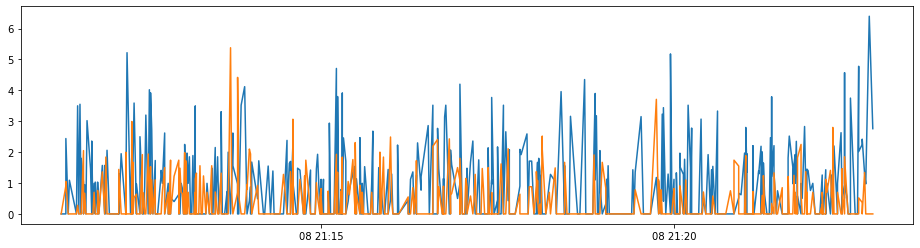

In [93]:
fig, ax = plt.subplots(figsize=(16, 4))
x = df['Created_at']
y = df['positive']
y2 = df['negative']
ax.plot(x, y)
ax.plot(x, y2)
plt.show()

In [94]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [95]:
df.columns

Index(['Created_at', 'tweets', 'positive', 'negative'], dtype='object')

In [100]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df['Created_at'], y=df['positive'], name="Positive sentiment"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['Created_at'], y=df['negative'], name="Negative sentiment"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC Tweet sentiment"
)

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Positive</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Negative</b>", secondary_y=True)

fig.show()